In [1]:
import pandas as pd

In [2]:
df_param=pd.read_csv('/Users/hassaanulhaq/Library/Mobile Documents/com~apple~CloudDocs/Hacklytics/hacklytics_25/hackathon_sample_v2.csv')

In [3]:
type(df_param['date'])

pandas.core.series.Series

In [4]:
df_param['date'] = pd.to_datetime(df_param['date'], format='%Y%m%d')

In [5]:
df_param['date'].value_counts()

date
2000-03-31    1319
2000-04-28    1274
2000-07-31    1258
2000-01-31    1241
2000-02-29    1229
              ... 
2009-11-30     863
2008-09-30     862
2008-10-31     859
2008-04-30     858
2008-05-30     851
Name: count, Length: 288, dtype: int64

In [6]:
df_param

,date,ret_eom,permno,shrcd,exchcd,mspread,year,month,size_port,rf,...,betadown_252d,bidaskhl_21d,corr_1260d,betabab_1260d,rmax5_rvol_21d,age,qmj,qmj_prof,qmj_growth,qmj_safety
0,2000-01-31,20000131,10078,11,3,0.017178,2000,1,B,0.0041,...,2.219037,0.012635,0.504688,1.581540,1.373224,180,1.700939,1.711756,1.476410,1.087626
1,2000-01-31,20000131,10104,11,3,0.019720,2000,1,B,0.0041,...,1.437330,0.016634,0.473872,1.941648,2.058353,180,0.828930,1.717670,-0.603531,0.608215
2,2000-01-31,20000131,10107,11,3,0.011369,2000,1,B,0.0041,...,1.466883,0.003855,0.563178,1.228124,1.899772,180,1.190962,1.682187,-0.583515,1.336684
3,2000-01-31,20000131,10108,11,1,0.010600,2000,1,B,0.0041,...,-0.285524,0.015658,0.327841,0.952188,1.187073,180,1.332815,1.453165,0.210170,1.130917
4,2000-01-31,20000131,10119,11,1,0.003485,2000,1,B,0.0041,...,0.217867,0.004411,0.289368,0.457370,0.715285,228,0.785417,-0.381167,1.689625,0.331900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273368,2023-12-29,20231231,93330,11,1,0.004891,2023,12,B,0.0043,...,0.946309,0.003779,0.720817,1.241060,1.464466,887,0.683460,0.169549,0.627055,0.745462
273369,2023-12-29,20231231,93356,11,3,0.004867,2023,12,B,0.0043,...,1.481037,0.007985,0.642513,1.388323,1.578243,227,1.679546,1.550166,0.993086,1.619852
273370,2023-12-29,20231231,93369,11,3,0.018935,2023,12,B,0.0043,...,1.239248,0.012130,0.454100,1.339266,1.407091,191,-0.039003,-0.435984,1.397522,-0.570584
273371,2023-12-29,20231231,93374,11,1,0.004107,2023,12,B,0.0043,...,0.870553,0.003574,0.653959,1.200649,1.754520,227,-0.801070,-0.632446,-0.982286,0.687467


In [7]:
def detect_and_adjust_splits_for_all_stocks(df_param):
    # Sort by stock_ticker and date to ensure proper comparison for each stock
    df_param = df_param.sort_values(by=['stock_ticker', 'date']).copy()

    # Iterate through each stock group identified by 'stock_ticker'
    for stock_ticker, stock_df_param in df_param.groupby('stock_ticker'):
        stock_df_param = stock_df_param.sort_values(by='date')

        # Iterate over the rows for the current stock to check for splits
        for i in range(1, len(stock_df_param)):
            prev_price = stock_df_param.iloc[i - 1]['prc']
            current_price = stock_df_param.iloc[i]['prc']
            prev_market_equity = stock_df_param.iloc[i - 1]['market_equity']
            current_market_equity = stock_df_param.iloc[i]['market_equity']

            # Detect a significant drop in price with a stable market equity
            if prev_price > current_price * 2 and abs(prev_market_equity - current_market_equity) < 0.1 * prev_market_equity:
                split_ratio = round(prev_price / current_price)
                print(
                    f"Stock split detected for {stock_ticker} on {stock_df_param.iloc[i]['date']} with a ratio of {split_ratio}-for-1")

                # Adjust all previous prices for this stock according to the split ratio
                df_param.loc[(df_param['stock_ticker'] == stock_ticker) & (
                    df_param['date'] <= stock_df_param.iloc[i]['date']), 'prc'] /= split_ratio

    df_param['stock_ticker'] = df_param['stock_ticker'].astype(str)
    return df_param

In [8]:
amazon_df = df_param[df_param['stock_ticker'] == 'AMZN']

In [9]:
amzn = (df_param['date'] == '2022-06-30') & (df_param['stock_ticker'] == 'AMZN')

# Print the row(s) that satisfy the condition
print(df_param[amzn])

             date   ret_eom  permno  shrcd  exchcd   mspread  year  month  \
254192 2022-06-30  20220630   84788     11       3  0.009438  2022      6   

       size_port      rf  ...  betadown_252d bidaskhl_21d corr_1260d  \
254192         B  0.0006  ...       1.998954     0.012568   0.613602   

       betabab_1260d  rmax5_rvol_21d  age      qmj  qmj_prof  qmj_growth  \
254192      1.241221        1.789639  329  0.95501   1.41511   -0.044419   

        qmj_safety  
254192    0.444381  

[1 rows x 165 columns]


In [10]:
# detect_and_adjust_splits_for_all_stocks(df_param)

Stock split detected for AA on 2000-07-31 00:00:00 with a ratio of 2-for-1
Stock split detected for AAP on 2004-02-27 00:00:00 with a ratio of 2-for-1
Stock split detected for AAPL on 2014-07-31 00:00:00 with a ratio of 7-for-1
Stock split detected for ABC on 2009-07-31 00:00:00 with a ratio of 2-for-1
Stock split detected for ADAP on 2000-04-28 00:00:00 with a ratio of 2-for-1
Stock split detected for ADBE on 2000-11-30 00:00:00 with a ratio of 2-for-1
Stock split detected for ADTN on 2004-01-30 00:00:00 with a ratio of 2-for-1
Stock split detected for ADVP on 2001-12-31 00:00:00 with a ratio of 2-for-1
Stock split detected for AFL on 2001-04-30 00:00:00 with a ratio of 2-for-1
Stock split detected for AFL on 2018-04-30 00:00:00 with a ratio of 2-for-1
Stock split detected for AGN on 2007-07-31 00:00:00 with a ratio of 2-for-1
Stock split detected for ALK on 2014-08-29 00:00:00 with a ratio of 2-for-1
Stock split detected for ALXN on 2008-09-30 00:00:00 with a ratio of 2-for-1
Stock s

,date,ret_eom,permno,shrcd,exchcd,mspread,year,month,size_port,rf,...,betadown_252d,bidaskhl_21d,corr_1260d,betabab_1260d,rmax5_rvol_21d,age,qmj,qmj_prof,qmj_growth,qmj_safety
14377,2000-12-29,20001231,87432,11,1,0.016473,2000,12,B,0.0050,...,2.234551,0.013440,NaN,NaN,1.267846,35,NaN,1.119352,NaN,1.643064
15502,2001-01-31,20010131,87432,11,1,0.011525,2001,1,B,0.0054,...,2.160193,0.016473,NaN,NaN,0.972802,36,NaN,1.115908,NaN,1.641713
16617,2001-02-28,20010228,87432,11,1,0.009882,2001,2,B,0.0038,...,2.209745,0.011525,NaN,NaN,1.010576,37,NaN,1.116300,NaN,1.637343
17688,2001-03-30,20010331,87432,11,1,0.015782,2001,3,B,0.0042,...,2.444064,0.009882,NaN,NaN,0.741048,38,NaN,1.373031,NaN,1.578964
18734,2001-04-30,20010430,87432,11,1,0.018775,2001,4,B,0.0039,...,2.223938,0.015782,NaN,NaN,1.251023,39,NaN,1.374396,NaN,1.578721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11766,2000-10-31,20001031,81191,11,1,0.001145,2000,10,B,0.0056,...,0.203153,0.001356,0.241254,0.387047,0.178172,129,0.877292,0.854015,0.833513,0.089310
12920,2000-11-30,20001130,81191,11,1,0.001128,2000,11,B,0.0051,...,0.160277,0.001145,0.235304,0.353111,0.141222,130,0.877337,0.806660,0.829075,0.177204
190997,2017-01-31,20170131,86288,11,3,0.006498,2017,1,B,0.0004,...,1.654570,0.006306,0.593051,1.347344,0.776385,252,1.493494,0.901489,1.169325,1.025705
191917,2017-02-28,20170228,86288,11,3,0.004856,2017,2,B,0.0004,...,1.659666,0.006498,0.602734,1.473598,0.927012,253,1.559059,1.003469,1.386983,1.027222


In [11]:
df_param.head()

,date,ret_eom,permno,shrcd,exchcd,mspread,year,month,size_port,rf,...,betadown_252d,bidaskhl_21d,corr_1260d,betabab_1260d,rmax5_rvol_21d,age,qmj,qmj_prof,qmj_growth,qmj_safety
0,2000-01-31,20000131,10078,11,3,0.017178,2000,1,B,0.0041,...,2.219037,0.012635,0.504688,1.581540,1.373224,180,1.700939,1.711756,1.476410,1.087626
1,2000-01-31,20000131,10104,11,3,0.019720,2000,1,B,0.0041,...,1.437330,0.016634,0.473872,1.941648,2.058353,180,0.828930,1.717670,-0.603531,0.608215
2,2000-01-31,20000131,10107,11,3,0.011369,2000,1,B,0.0041,...,1.466883,0.003855,0.563178,1.228124,1.899772,180,1.190962,1.682187,-0.583515,1.336684
3,2000-01-31,20000131,10108,11,1,0.010600,2000,1,B,0.0041,...,-0.285524,0.015658,0.327841,0.952188,1.187073,180,1.332815,1.453165,0.210170,1.130917
4,2000-01-31,20000131,10119,11,1,0.003485,2000,1,B,0.0041,...,0.217867,0.004411,0.289368,0.457370,0.715285,228,0.785417,-0.381167,1.689625,0.331900


In [12]:
type(df_param['date'])

pandas.core.series.Series

In [13]:
# plt.plot(df_param['date'][df_param['stock_ticker'] == 'AAPL'], df_param['prc'][df_param['stock_ticker'] == 'AAPL'])

In [14]:
df_param_2012_2016 = df_param[(df_param['date'] >= '2012-01-01') & (df_param['date'] <= '2016-12-31')]
print(df_param_2012_2016[['date','prc']])

             date         prc
135414 2012-01-31   25.650000
135415 2012-01-31   25.959999
135416 2012-01-31   56.950001
135417 2012-01-31   54.349998
135418 2012-01-31   21.540001
...           ...         ...
190288 2016-12-30   14.970000
190289 2016-12-30   19.660000
190290 2016-12-30   57.639999
190291 2016-12-30   68.900002
190292 2016-12-30  189.399994

[54879 rows x 2 columns]


In [15]:
columns = df_param.columns
print(columns)

Index(['date', 'ret_eom', 'permno', 'shrcd', 'exchcd', 'mspread', 'year',
       'month', 'size_port', 'rf',
       ...
       'betadown_252d', 'bidaskhl_21d', 'corr_1260d', 'betabab_1260d',
       'rmax5_rvol_21d', 'age', 'qmj', 'qmj_prof', 'qmj_growth', 'qmj_safety'],
      dtype='object', length=165)


In [16]:
df_param['prc'].describe()

count    273373.000000
mean        267.964871
std        7425.091816
min           0.349500
25%          27.980000
50%          44.750000
75%          72.910004
max      546725.000000
Name: prc, dtype: float64

In [17]:
df_param['stock_ticker'].value_counts()

stock_ticker
ADI     288
EFX     288
MAT     288
WFC     288
GNTX    288
       ... 
JAZZ      1
KREM      1
DDIC      1
MONE      1
AZX       1
Name: count, Length: 3565, dtype: int64

In [18]:
# Get user input for the stock ticker
selected_ticker = input("Enter the stock ticker: ")

# Filter the dataframe based on the selected stock ticker
filtered_df = df_param[df_param['stock_ticker'] == selected_ticker]

# Display the filtered dataframe
print(filtered_df)

             date   ret_eom  permno  shrcd  exchcd   mspread  year  month  \
2      2000-01-31  20000131   10107     11       3  0.011369  2000      1   
1244   2000-02-29  20000229   10107     11       3  0.012729  2000      2   
2473   2000-03-31  20000331   10107     11       3  0.011168  2000      3   
3792   2000-04-28  20000430   10107     11       3  0.010682  2000      4   
5066   2000-05-31  20000531   10107     11       3  0.008211  2000      5   
...           ...       ...     ...    ...     ...       ...   ...    ...   
268321 2023-08-31  20230831   10107     11       3  0.004009  2023      8   
269342 2023-09-29  20230930   10107     11       3  0.004676  2023      9   
270360 2023-10-31  20231031   10107     11       3  0.008113  2023     10   
271366 2023-11-30  20231130   10107     11       3  0.003063  2023     11   
272377 2023-12-29  20231231   10107     11       3  0.003180  2023     12   

       size_port      rf  ...  betadown_252d bidaskhl_21d corr_1260d  \
2  

In [19]:
detect_and_adjust_splits_for_all_stocks(filtered_df)

Stock split detected for MSFT on 2003-03-31 00:00:00 with a ratio of 2-for-1


,date,ret_eom,permno,shrcd,exchcd,mspread,year,month,size_port,rf,...,betadown_252d,bidaskhl_21d,corr_1260d,betabab_1260d,rmax5_rvol_21d,age,qmj,qmj_prof,qmj_growth,qmj_safety
2,2000-01-31,20000131,10107,11,3,0.011369,2000,1,B,0.0041,...,1.466883,0.003855,0.563178,1.228124,1.899772,180,1.190962,1.682187,-0.583515,1.336684
1244,2000-02-29,20000229,10107,11,3,0.012729,2000,2,B,0.0043,...,1.199896,0.011369,0.562876,1.163512,0.976748,181,1.188351,1.649329,-0.582644,1.348681
2473,2000-03-31,20000331,10107,11,3,0.011168,2000,3,B,0.0047,...,1.305179,0.012729,0.565107,1.199364,1.324651,182,1.179418,1.650308,-0.600240,1.344681
3792,2000-04-28,20000430,10107,11,3,0.010682,2000,4,B,0.0046,...,1.122640,0.011168,0.571305,1.217491,2.013197,183,1.168565,1.651746,-0.608397,1.324899
5066,2000-05-31,20000531,10107,11,3,0.008211,2000,5,B,0.0050,...,1.091654,0.010682,0.574428,1.249297,1.300202,184,0.990337,1.610057,-0.982859,1.372388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268321,2023-08-31,20230831,10107,11,3,0.004009,2023,8,B,0.0045,...,1.085159,0.005970,0.772962,1.268897,1.106766,463,1.669971,1.661675,1.252184,1.156897
269342,2023-09-29,20230930,10107,11,3,0.004676,2023,9,B,0.0043,...,1.101958,0.004009,0.774575,1.294754,0.655596,464,1.670899,1.660464,1.247857,1.159554
270360,2023-10-31,20231031,10107,11,3,0.008113,2023,10,B,0.0047,...,1.120765,0.004676,0.775555,1.353114,0.619865,465,1.665901,1.659354,1.251799,1.161485
271366,2023-11-30,20231130,10107,11,3,0.003063,2023,11,B,0.0044,...,1.033637,0.008113,0.772097,1.355138,1.289369,466,1.681117,1.652865,1.291517,1.233534


## import model

In [20]:
import torch

In [21]:
filtered_df['prc']=filtered_df['prc'].astype(float)

/var/folders/9c/cqhq_9tn7xg260y42gb15wym0000gn/T/ipykernel_27165/1414699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['prc']=filtered_df['prc'].astype(float)


In [22]:
df=filtered_df

In [23]:
lookback=5
timeseries = df[["prc"]].values.astype('float32')
X, y = [], []
for i in range(len(timeseries)-lookback):
    feature = timeseries[i:i+lookback]
    target = timeseries[i+1:i+lookback+1]
    X.append(feature)
    y.append(target)
    
X = torch.tensor(X)
y = torch.tensor(y)
print(X.shape, y.shape)

torch.Size([283, 5, 1]) torch.Size([283, 5, 1])


/var/folders/9c/cqhq_9tn7xg260y42gb15wym0000gn/T/ipykernel_27165/2402802902.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  X = torch.tensor(X)


In [24]:
import torch.nn as nn
class StockModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [25]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data
model = StockModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X, y), shuffle=True, batch_size=8)
for epoch in range(1000):
    for xx, yy in loader:
        optimizer.zero_grad()
        output = model(xx)
        loss = loss_fn(output, yy)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        continue 
    model.eval()
    with torch.no_grad():
        y_pred = model(X)
        rmse = np.sqrt(loss_fn(y_pred, y))
    print(f"Epoch {epoch}: RMSE {rmse:.4f}")

Epoch 1: RMSE 114.5705
Epoch 2: RMSE 112.8744
Epoch 3: RMSE 111.2258
Epoch 4: RMSE 109.4803
Epoch 5: RMSE 108.0660
Epoch 6: RMSE 106.7895
Epoch 7: RMSE 105.6010
Epoch 8: RMSE 104.5661
Epoch 9: RMSE 103.5674
Epoch 11: RMSE 101.8254
Epoch 12: RMSE 100.9866
Epoch 13: RMSE 100.1890
Epoch 14: RMSE 99.4147
Epoch 15: RMSE 98.7005
Epoch 16: RMSE 97.9654
Epoch 17: RMSE 97.3535
Epoch 18: RMSE 96.6838
Epoch 19: RMSE 96.0129
Epoch 21: RMSE 94.5633
Epoch 22: RMSE 93.8953
Epoch 23: RMSE 93.2823
Epoch 24: RMSE 92.6046
Epoch 25: RMSE 92.0263
Epoch 26: RMSE 91.3560
Epoch 27: RMSE 90.7101
Epoch 28: RMSE 90.0878
Epoch 29: RMSE 89.5504
Epoch 31: RMSE 88.4026
Epoch 32: RMSE 87.7957
Epoch 33: RMSE 87.2176
Epoch 34: RMSE 86.6597
Epoch 35: RMSE 86.1269
Epoch 36: RMSE 85.5656
Epoch 37: RMSE 85.0163
Epoch 38: RMSE 84.4913
Epoch 39: RMSE 83.9726
Epoch 41: RMSE 82.9306
Epoch 42: RMSE 82.4227
Epoch 43: RMSE 81.8663
Epoch 44: RMSE 81.3525
Epoch 45: RMSE 80.8255
Epoch 46: RMSE 80.3234
Epoch 47: RMSE 79.8556
Epoch 48

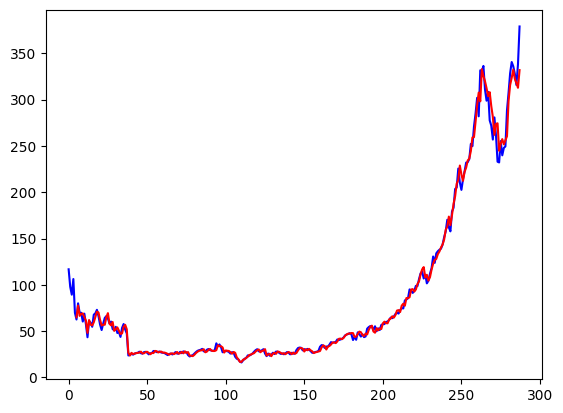

In [26]:
import matplotlib.pyplot as plt
with torch.no_grad():
    pred_series = np.ones_like(timeseries) * np.nan
    pred_series[lookback:] = model(X)[:, -1, :]
plt.plot(timeseries, c='blue')
plt.plot(pred_series, c='red')
plt.show()

In [27]:
error = abs(timeseries - pred_series)
error_series = pd.Series(error.flatten()).dropna() #remove nulls
price_series = pd.Series(timeseries.flatten())[error_series.index] # align indexes after removing nulls



In [28]:
error_series

5       2.404961
6       2.446716
7       3.338409
8       1.277969
9       8.793610
         ...    
283     3.623505
284     5.464020
285     2.056274
286    25.396606
287    47.131104
Length: 283, dtype: float32

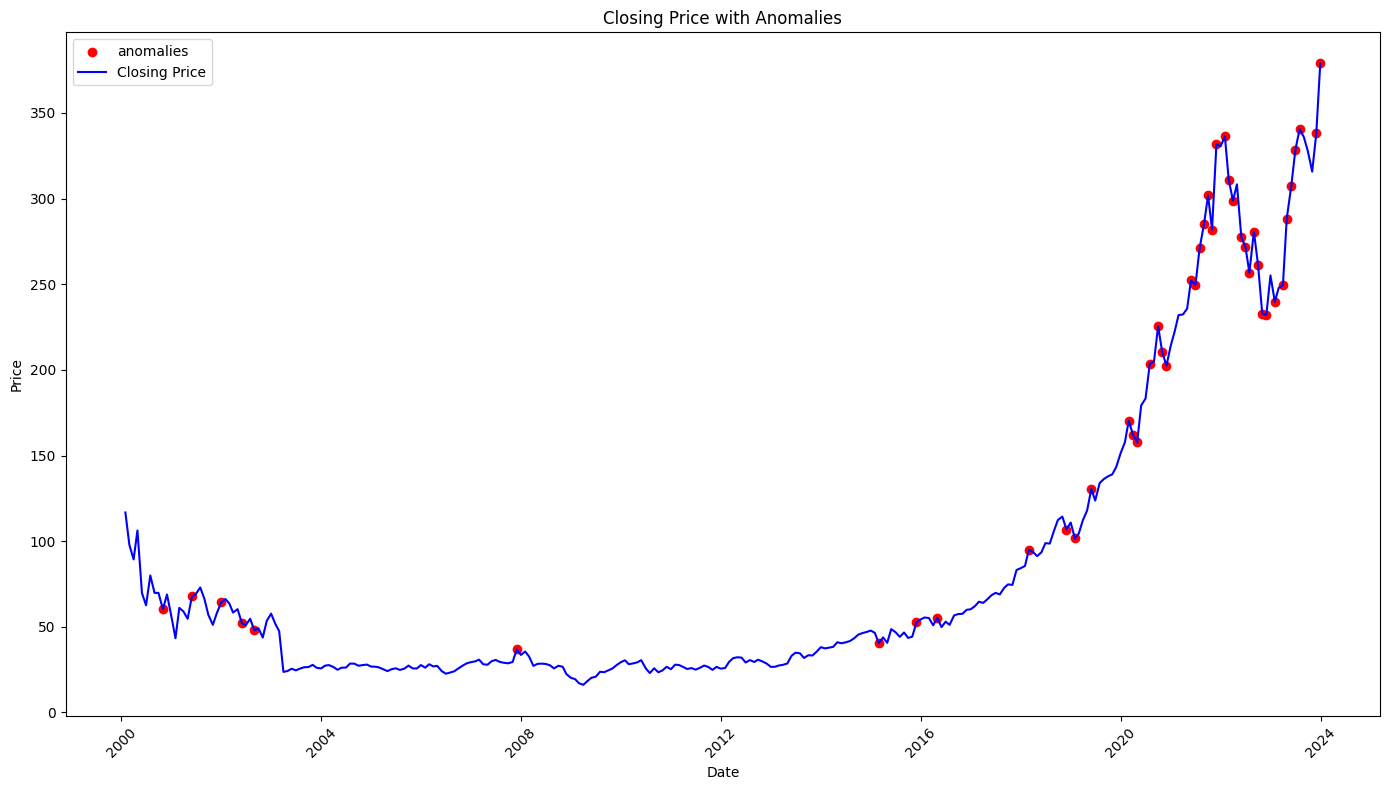

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = filtered_df.sort_values('date')

if isinstance(pred_series, np.ndarray) and pred_series.ndim == 2:
    pred_series = pred_series.flatten()  

if len(pred_series) != len(filtered_df):
    raise ValueError(f"Length mismatch: filtered_df has {len(filtered_df)} rows, but pred_series has {len(pred_series)} elements")

error = abs(filtered_df['prc'].values - pred_series)
error_series = pd.Series(error, index=filtered_df['date'])
price_series = pd.Series(filtered_df['prc'].values, index=filtered_df['date'])

threshold = 6  
anomalies_filter = error_series > threshold
anomalies = price_series[anomalies_filter]

plt.figure(figsize=(14, 8))
plt.scatter(anomalies.index, anomalies.values, color="red", label="anomalies")
plt.plot(filtered_df['date'], filtered_df['prc'], color='blue', label='Closing Price')
plt.title('Closing Price with Anomalies')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import pandas as pd
import numpy as np

# Initialize plotly for offline use
init_notebook_mode(connected=True)

# Ensure filtered_df has a 'date' column and is sorted
filtered_df = filtered_df.sort_values('date')
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Reshape pred_series if it's 2D
if isinstance(pred_series, np.ndarray) and pred_series.ndim == 2:
    pred_series = pred_series.flatten()

# Ensure pred_series has the same length as filtered_df
if len(pred_series) != len(filtered_df):
    raise ValueError(f"Length mismatch: filtered_df has {len(filtered_df)} rows, but pred_series has {len(pred_series)} elements")

# Calculate error and detect anomalies
error = abs(filtered_df['prc'].values - pred_series)
error_series = pd.Series(error, index=filtered_df['date'])
price_series = pd.Series(filtered_df['prc'].values, index=filtered_df['date'])

threshold = 6  # Adjust this value as needed
anomalies_filter = error_series > threshold
anomalies = price_series[anomalies_filter]

# Create the line plot
trace1 = go.Scatter(
    x=filtered_df['date'], 
    y=filtered_df['prc'],
    mode='lines',
    name='Closing Price'
)

# Create scatter plot for anomalies
trace2 = go.Scatter(
    x=anomalies.index, 
    y=anomalies.values,
    mode='markers',
    name='Anomaly',
    marker=dict(color='red', size=5)
)

# Combine the traces
data = [trace1, trace2]

# Define the layout with range slider and selector
layout = go.Layout(
    title='Closing Price Over Time with Anomalies',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=0, label="This Year", step="year", stepmode="todate"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    yaxis=dict(title='Price'),
    hovermode='closest'
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
iplot(fig)
